## PREDICTING CRIME RATE IN CHICAGO USING FACEBOOK PROPHET


The Chicago Crime dataset contains a summary of the reported crimes occured in the City of Chiacgo from 2001 to 2017.
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. - Dataset contains the following columns:

- ID: Unique identifier for the record.
- Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
- Date: Date when the incident occurred.
- Block: address where the incident occurred
- IUCR: The Illinois Unifrom Crime Reporting code.
- Primary Type: The primary description of the IUCR code.
- Description: The secondary description of the IUCR code, a subcategory of the primary description.
- Location Description: Description of the location where the incident occurred.
- Arrest: Indicates whether an arrest was made.
- Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
- Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.
- District: Indicates the police district where the incident occurred.
Ward: The ward (City Council district) where the incident occurred.
- Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas.
- FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
- X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
- Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.
- Year: Year the incident occurred.
- Updated On: Date and time the record was last updated.
- Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block. 
- Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block. 
- Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

In [25]:
# !pip install prophet

## Importing the dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [27]:
chicago_crimes3 = pd.read_csv('./archive/Chicago_Crimes_2008_to_2011.csv', on_bad_lines = 'skip')
chicago_crimes4 = pd.read_csv('./archive/Chicago_Crimes_2012_to_2017.csv', on_bad_lines = 'skip')

In [28]:
chicago_crimes_df = pd.concat([chicago_crimes3, chicago_crimes4])

## Exploring the Data


In [29]:
chicago_crimes_df.shape

(4145424, 23)

In [30]:
chicago_crimes_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [31]:
chicago_crimes_df.tail()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [32]:
# plt.figure(figsize=(10,10))
# sns.heatmap(chicago_crimes_df.isnull(), cbar= False, cmap='YlGnBu')

In [33]:
chicago_crimes_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [34]:
chicago_crimes_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10/07/2008 12:39:00 PM,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False
1,10/09/2008 03:30:00 AM,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2,10/09/2008 08:35:00 AM,030XX W MANN DR,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False
3,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False
4,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [35]:
chicago_crimes_df.Date = pd.to_datetime(chicago_crimes_df.Date, format='%m/%d/%Y %I:%M:%S %p') 

In [36]:
chicago_crimes_df.Date

0         2008-10-07 12:39:00
1         2008-10-09 03:30:00
2         2008-10-09 08:35:00
3         2008-10-10 02:33:00
4         2008-10-10 12:50:00
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 4145424, dtype: datetime64[ns]

In [49]:
chicago_crimes_df.index = pd.DatetimeIndex(chicago_crimes_df.Date)

In [50]:
chicago_crimes_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2008-10-07 12:39:00,2008-10-07 12:39:00,000XX E 75TH ST,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False
2008-10-09 03:30:00,2008-10-09 03:30:00,048XX W POLK ST,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False
2008-10-09 08:35:00,2008-10-09 08:35:00,030XX W MANN DR,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False
2008-10-10 02:33:00,2008-10-10 02:33:00,052XX W CHICAGO AVE,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False
2008-10-10 12:50:00,2008-10-10 12:50:00,026XX S HOMAN AVE,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [40]:
order_data = chicago_crimes_df['Primary Type'].value_counts().iloc[:15].index
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN'],
      dtype='object', name='Primary Type')

In [43]:
order_data = list(set(order_data))

In [45]:
if chicago_crimes_df.index.duplicated().any():
    chicago_crimes_df.reset_index(drop=True, inplace=True)

<Axes: xlabel='count', ylabel='Primary Type'>

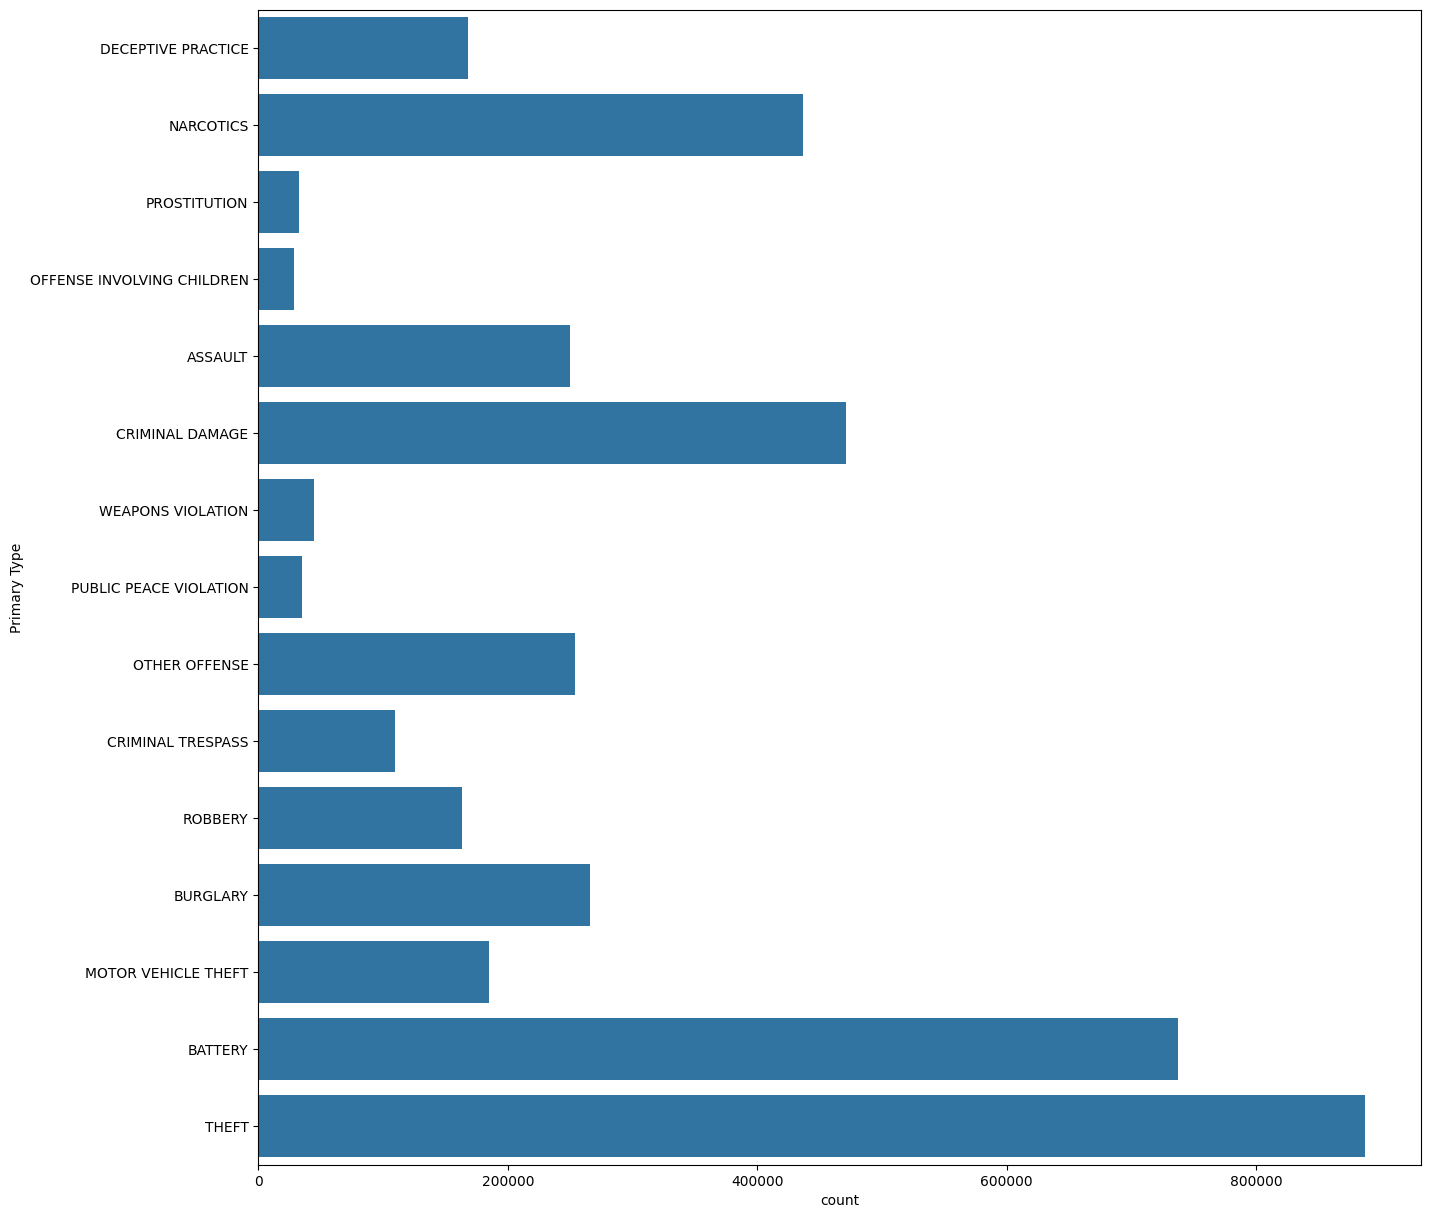

In [46]:
plt.figure(figsize=(15, 15))
sns.countplot(y = 'Primary Type', data = chicago_crimes_df, order= order_data )

<Axes: xlabel='count', ylabel='Location Description'>

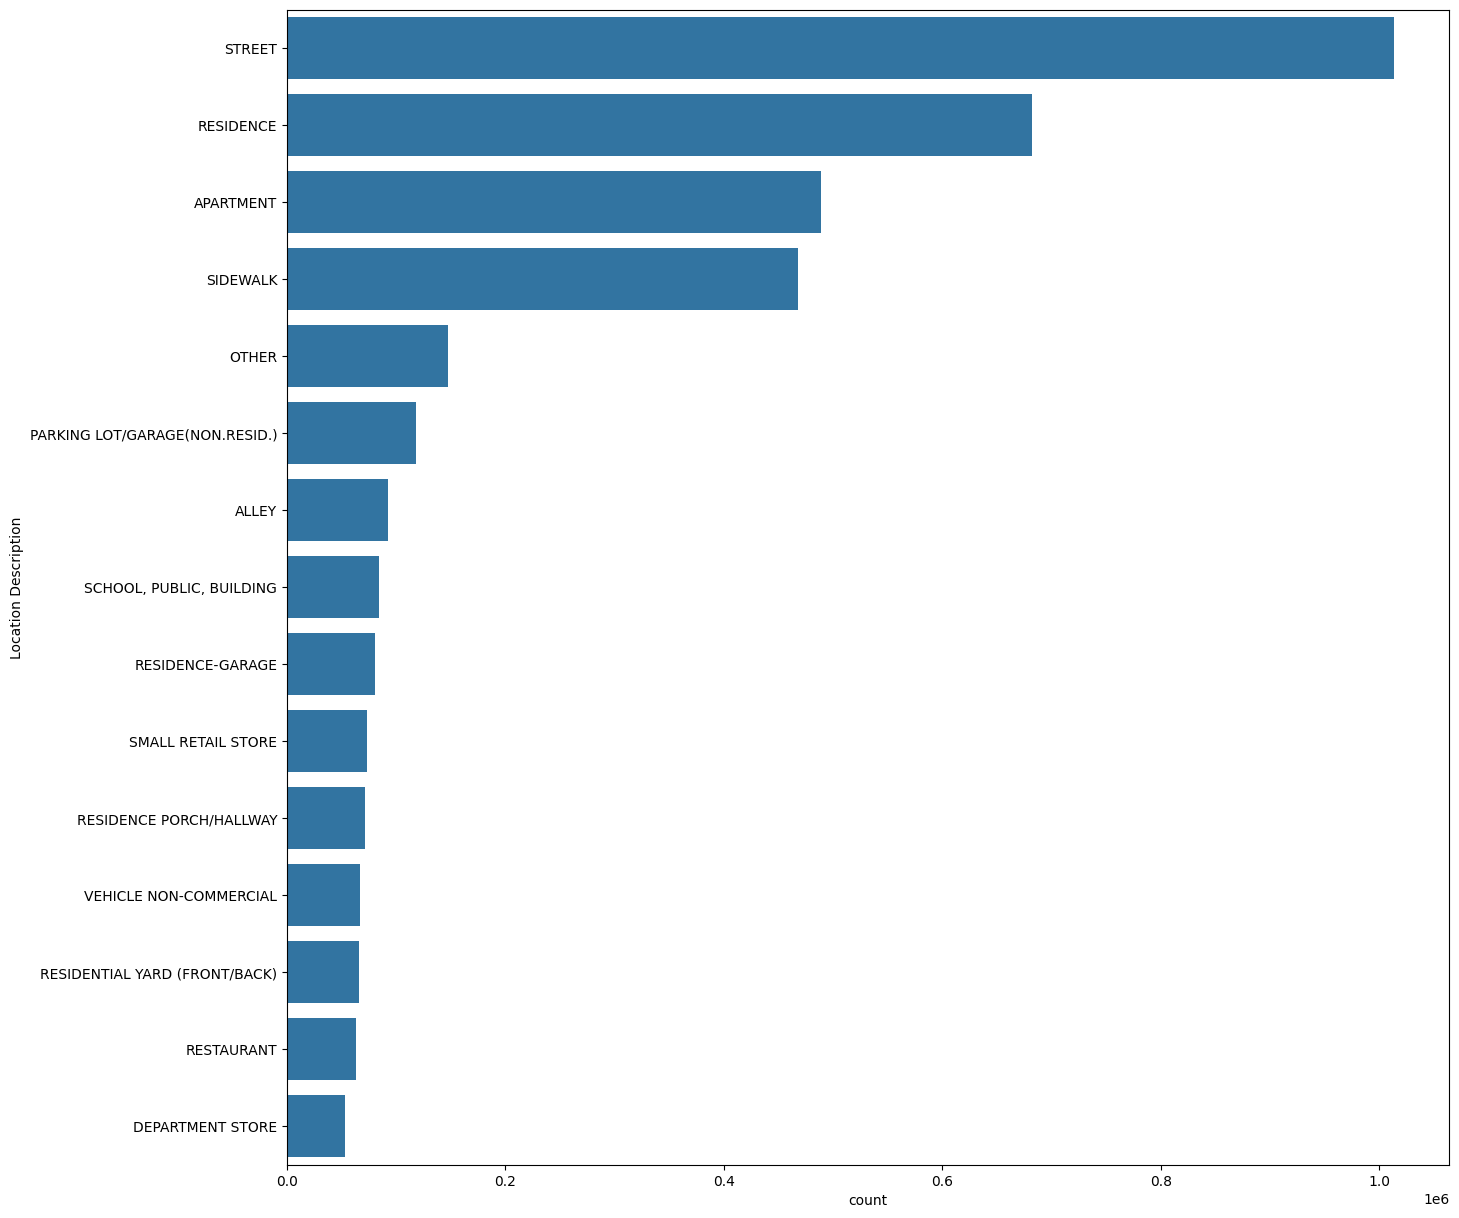

In [48]:
plt.figure(figsize=(15, 15))
sns.countplot(y = 'Location Description', data = chicago_crimes_df, order = chicago_crimes_df['Location Description'].value_counts().iloc[:15].index)

In [53]:
chicago_crimes_df.resample('Y').size()

/tmp/ipykernel_15518/4099904543.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  chicago_crimes_df.resample('Y').size()


Date
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: YE-DEC, dtype: int64

/tmp/ipykernel_15518/635883823.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_crimes_df.resample('Y').size())


Text(0, 0.5, 'Number of Crimes')

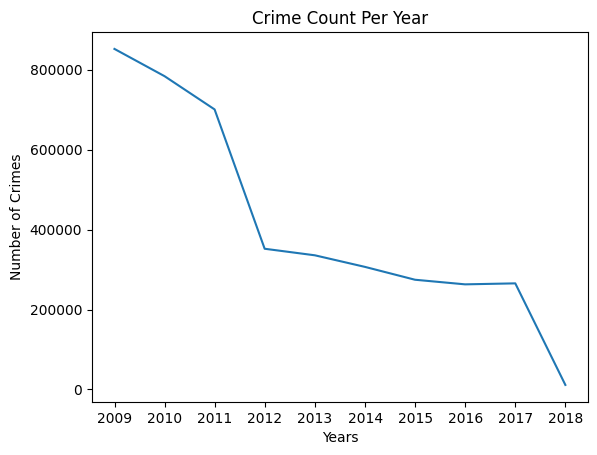

In [54]:
plt.plot(chicago_crimes_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [55]:
chicago_crimes_df.resample('M').size()

/tmp/ipykernel_15518/2155160043.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_crimes_df.resample('M').size()


Date
2008-01-31    66483
2008-02-29    57378
2008-03-31    67662
2008-04-30    71002
2008-05-31    76034
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: ME, Length: 109, dtype: int64

/tmp/ipykernel_15518/3792657551.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(chicago_crimes_df.resample('M').size())


Text(0, 0.5, 'Number of Crimes')

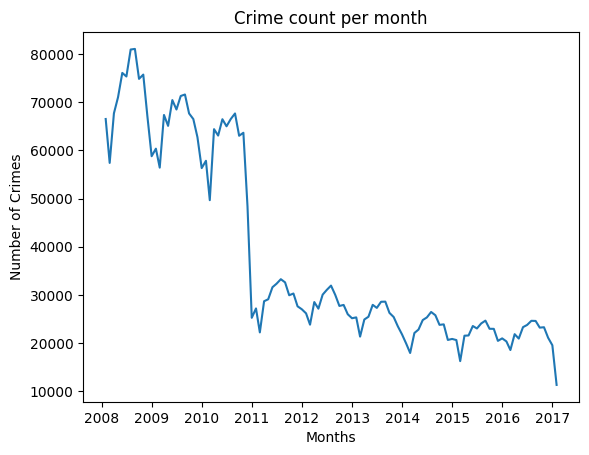

In [56]:
plt.plot(chicago_crimes_df.resample('M').size())
plt.title('Crime count per month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

/tmp/ipykernel_15518/1672166569.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(chicago_crimes_df.resample('Q').size())


Text(0, 0.5, 'Number of Crimes')

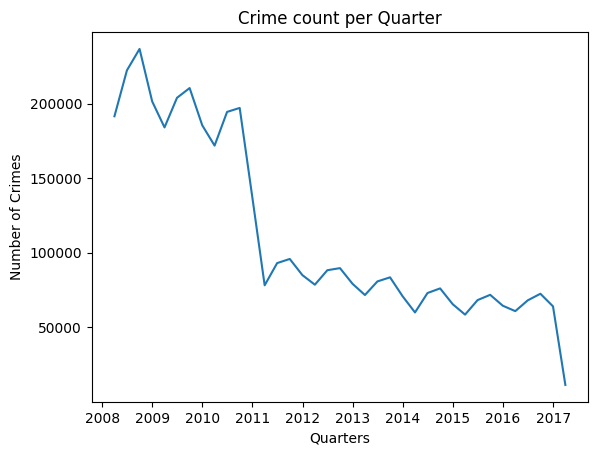

In [57]:
plt.plot(chicago_crimes_df.resample('Q').size())
plt.title('Crime count per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

## Preparing the Data

In [58]:
chicago_prophet = chicago_crimes_df.resample('M').size().reset_index()

/tmp/ipykernel_15518/2247481446.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_prophet = chicago_crimes_df.resample('M').size().reset_index()


In [60]:
chicago_prophet.columns = ['Data', 'Crime Count']

In [61]:
chicago_prophet

,Data,Crime Count
0,2008-01-31,66483
1,2008-02-29,57378
2,2008-03-31,67662
3,2008-04-30,71002
4,2008-05-31,76034
...,...,...
104,2016-09-30,23235
105,2016-10-31,23314
106,2016-11-30,21140
107,2016-12-31,19580


In [62]:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Data': 'ds', 'Crime Count': 'y'})

In [63]:
chicago_prophet_df_final

,ds,y
0,2008-01-31,66483
1,2008-02-29,57378
2,2008-03-31,67662
3,2008-04-30,71002
4,2008-05-31,76034
...,...,...
104,2016-09-30,23235
105,2016-10-31,23314
106,2016-11-30,21140
107,2016-12-31,19580


## Make Predictions

In [64]:
m = Prophet()
m.fit(chicago_prophet_df_final)

17:38:13 - cmdstanpy - INFO - Chain [1] start processing
17:38:13 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = m.make_future_dataframe(periods = 365 * 2)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-31,78699.595428,65991.996843,80379.853573,78699.595428,78699.595428,-5618.211817,-5618.211817,-5618.211817,-5618.211817,-5618.211817,-5618.211817,0.0,0.0,0.0,73081.383611
1,2008-02-29,77772.444713,60644.062229,75882.047161,77772.444713,77772.444713,-9309.311232,-9309.311232,-9309.311232,-9309.311232,-9309.311232,-9309.311232,0.0,0.0,0.0,68463.133481
2,2008-03-31,76781.352569,67978.862219,82819.179552,76781.352569,76781.352569,-1726.851110,-1726.851110,-1726.851110,-1726.851110,-1726.851110,-1726.851110,0.0,0.0,0.0,75054.501459
3,2008-04-30,75822.231140,67272.057101,81932.791504,75822.231140,75822.231140,-1229.834248,-1229.834248,-1229.834248,-1229.834248,-1229.834248,-1229.834248,0.0,0.0,0.0,74592.396892
4,2008-05-31,74831.138995,70252.803569,84775.009205,74831.138995,74831.138995,2687.621886,2687.621886,2687.621886,2687.621886,2687.621886,2687.621886,0.0,0.0,0.0,77518.760880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,2019-01-27,14317.014405,497.227555,14566.441714,12449.625598,15983.630940,-6678.153914,-6678.153914,-6678.153914,-6678.153914,-6678.153914,-6678.153914,0.0,0.0,0.0,7638.860491
835,2019-01-28,14311.308207,680.362212,14796.672895,12441.537016,15981.062760,-6460.078070,-6460.078070,-6460.078070,-6460.078070,-6460.078070,-6460.078070,0.0,0.0,0.0,7851.230137
836,2019-01-29,14305.602009,859.054158,15956.416005,12435.273175,15978.354016,-6190.248760,-6190.248760,-6190.248760,-6190.248760,-6190.248760,-6190.248760,0.0,0.0,0.0,8115.353249
837,2019-01-30,14299.895810,676.382810,16425.178661,12429.009334,15975.645272,-5876.586943,-5876.586943,-5876.586943,-5876.586943,-5876.586943,-5876.586943,0.0,0.0,0.0,8423.308867


/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


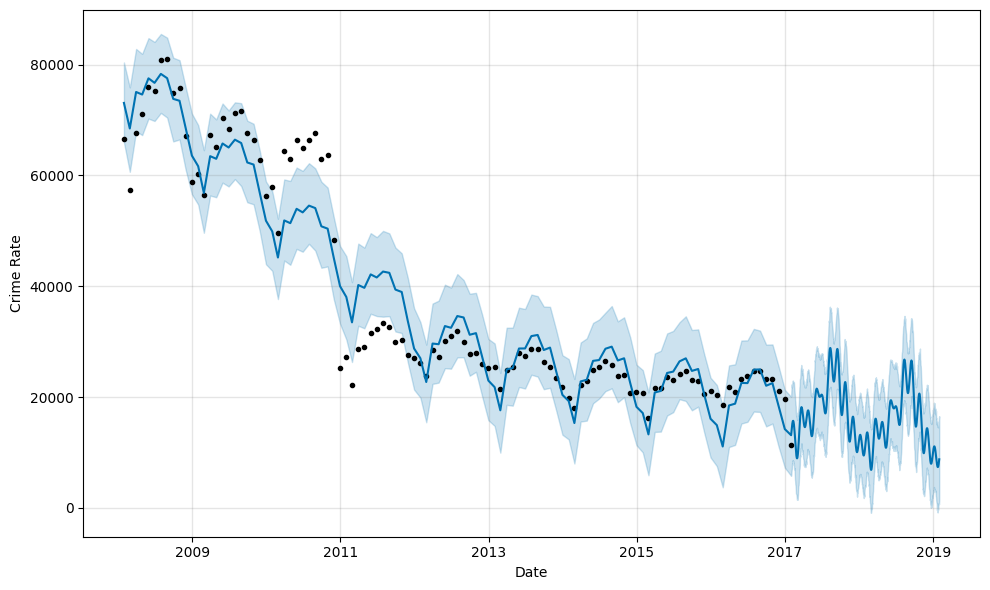

In [70]:
figure = m.plot(forcast, xlabel='Date', ylabel='Crime Rate')

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects

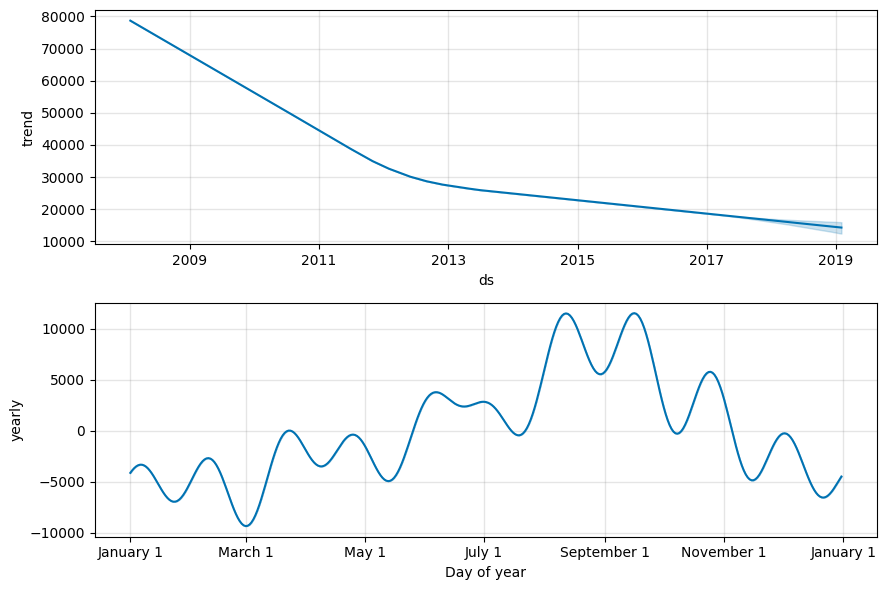

In [71]:
figure = m.plot_components(forcast)